# Udacity Project: Writing a Data Science Blog Post

In [297]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

## Introduction

### Dataset
For this project, the Seattle Airbnb Dataset was chosen. 

Since 2008, Airbnb has been facilitating a distinctive and personalized way of travel for both guests and hosts. This dataset, a component of the Airbnb Inside initiative, outlines the listing activity of homestays in Seattle, WA.

The Seattle dataset encompasses the following Airbnb activities:
* Listings, comprising comprehensive descriptions and average review scores.
* Reviews, featuring unique identifiers for each reviewer along with detailed comments.
* Calendar, incorporating listing IDs, daily prices, and availability information.


### Business Background and Questions 

This dataset could be utilized by an investor seeking to purchase a condominium and lease it through Airbnb. The investor may be interested in determining the optimal district for acquiring a flat and strategies for achieving a high occupancy rate.

Key business questions are:

* Which neighborhoods in Seattle are the most popular?
* What are the peak and off-peak months in terms of expense and activity for staying in an Airbnb in Seattle?
* What variables hold the most significance in attaining a high occupancy rate?

## Gathering Data

In [298]:
# import datasets into pandas dataframe

input_path = Path('archive')

df_calendar = pd.read_csv(input_path/'calendar.csv', sep=',')
df_listings = pd.read_csv(input_path/'listings.csv', sep=',')
df_reviews = pd.read_csv(input_path/'reviews.csv', sep=',')

## Discovering Datasets

The datasets will be investigated to see what kind of data is included, if data is missing and what information is most valuable to answer the business quenstions.

### Calender

In [299]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [300]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


The price column seem to have some missing values

In [301]:
df_calendar.available.value_counts()

available
t    934542
f    459028
Name: count, dtype: int64

The column 'available' has only two different values.

### Listings

In [302]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [303]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

This dataframe contains a lot of information. However, there are many missing values, which will be taken care of later.

Having a look how many different neighborhoods are in the dataset:

In [304]:
df_listings['neighbourhood_group_cleansed'].value_counts()

neighbourhood_group_cleansed
Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: count, dtype: int64

### Reviews

In [305]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [306]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## Data Preparation

####  Cleaning and Dealing with missing values

* The column 'experiences_offered' only has none as values and can be dropped.
* The column 'square_feet' has too many missing values and will not be considered in the further analysis.

In [307]:
df_listings = df_listings.drop('experiences_offered', axis=1)
df_listings = df_listings.drop('square_feet', axis=1)
df_listings.dropna(subset=['host_is_superhost'], inplace=True)

### Formatting
Some data needs to be formated in order to match the requirement of the analysis.

The price data in the dataframe has the type string. For the analysis floats are required. Also the unit $ will be removed.

In [308]:
# transform price to float
df_calendar.price = df_calendar.price.str.replace('$', '')
df_calendar.price = df_calendar.price.str.replace(',', '').astype(float)

df_listings.cleaning_fee = df_listings.cleaning_fee.str.replace('$', '').astype(float)

Dates need to be transformed from string to datetime using pandas.

In [309]:
# convert string to datetime
df_calendar.date = pd.to_datetime(df_calendar.date)

Calculating the average price for each listing_id

In [310]:
df_avg_price = df_calendar[['listing_id', 'price']].groupby('listing_id').mean()
df_avg_price

,price
listing_id,
3335,120.000000
4291,82.000000
5682,53.944984
6606,92.849315
7369,85.000000
...,...
10332096,40.000000
10334184,120.000000
10339144,NaN


Calculating the days where the listing_id is booked out. It will be assumed that if the listing is not available, the accomodation is booked out.

In [311]:
df_booked = df_calendar[df_calendar.available == 'f'].groupby('listing_id').count().available
df_booked

listing_id
3335         56
5682         56
7369        312
9460        308
9531        185
           ... 
10319529    364
10331249     11
10334184      4
10339144    365
10340165      7
Name: available, Length: 3140, dtype: int64

Merging the calculated columns to the listing dataframe

In [312]:
# merge dataframes
merged_df = pd.merge(df_booked, df_avg_price, on=['listing_id'], how='inner')
merged_df.rename(columns={'price': 'avg_price', 'available': 'days_booked'}, inplace=True)

# merge dataframes to listings
df_listings = pd.merge(df_listings, merged_df, left_on='id', right_on='listing_id', how='inner')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,...,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,days_booked,avg_price
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,...,NaN,WASHINGTON,f,moderate,f,f,2,4.07,19,85.000000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,...,NaN,WASHINGTON,f,strict,t,t,6,1.48,74,170.931271
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,...,NaN,WASHINGTON,f,strict,f,f,2,1.15,145,1301.818182
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,...,NaN,WASHINGTON,f,flexible,f,f,1,NaN,222,100.000000
4,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,This part of Queen Anne has wonderful views an...,Let me know if you need anything or have sugge...,...,NaN,WASHINGTON,f,strict,f,f,1,2.45,63,125.629139


## Analyzing Data

### 1. Which neighborhoods in Seattle are the most popular?


Bar plots were chosen to answer this question as the primary visualization tool for their ability to succinctly and effectively convey categorical data. Bar plots provide a clear representation, facilitating easy comparisons and identification of patterns. 

#### Average price per night

Calculating the average price per night for each Seattle neighborhood group:

In [313]:
#popular in terms of df_avg_price
columns = ['neighbourhood_group_cleansed', 'avg_price']
df_neighbourhood_avgprice = df_listings[columns].groupby('neighbourhood_group_cleansed').mean()
df_neighbourhood_avgprice = df_neighbourhood_avgprice.sort_values('avg_price', ascending=False)
df_neighbourhood_avgprice

,avg_price
neighbourhood_group_cleansed,
Magnolia,187.163842
Downtown,177.702021
Queen Anne,166.321899
Cascade,147.152582
West Seattle,145.251763
Capitol Hill,135.891009
Central Area,131.702636
Other neighborhoods,128.856905
Ballard,124.835619


Creating a bar plot to compare the price per night for the neighborhoods

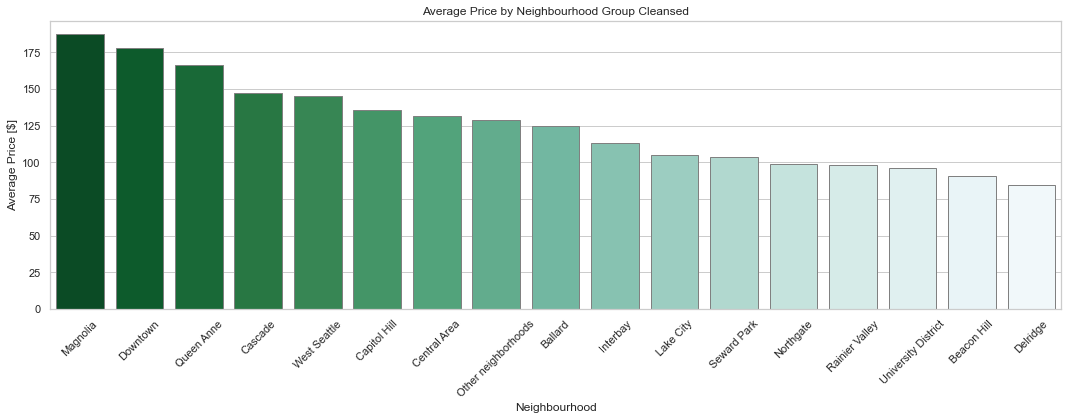

In [314]:
sns.set(style="whitegrid")

# Create a barplot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(x=df_neighbourhood_avgprice.index , y=df_neighbourhood_avgprice.avg_price, data=df_neighbourhood_avgprice, palette='BuGn_r', edgecolor='grey', hue=df_neighbourhood_avgprice.index, legend=False)

# Adding labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price [$]')
plt.title('Average Price by Neighbourhood Group Cleansed')

plt.xticks(rotation=45)

# Adjust layout to prevent clipping of rotated labels
plt.tight_layout()

# Show the plot
plt.show();

The neighborhoods with the highest average price per night are Magnolia, Downtown, and Queen Anne.

#### Occupation rate

Calculating the occupation rate for each neighborhood group in Seattle:

In [315]:
columns = ['neighbourhood_group_cleansed', 'days_booked']

df_neighbourhood_daysbooked = df_listings[columns].groupby('neighbourhood_group_cleansed').mean()
df_neighbourhood_daysbooked = df_neighbourhood_daysbooked.sort_values('days_booked', ascending=False)
df_neighbourhood_daysbooked

,days_booked
neighbourhood_group_cleansed,
Cascade,183.573333
Seward Park,171.300000
Capitol Hill,159.414163
Queen Anne,155.403042
Central Area,152.168966
Other neighborhoods,147.289474
University District,145.923077
Beacon Hill,142.222222
Downtown,141.235789


Creating a bar plot

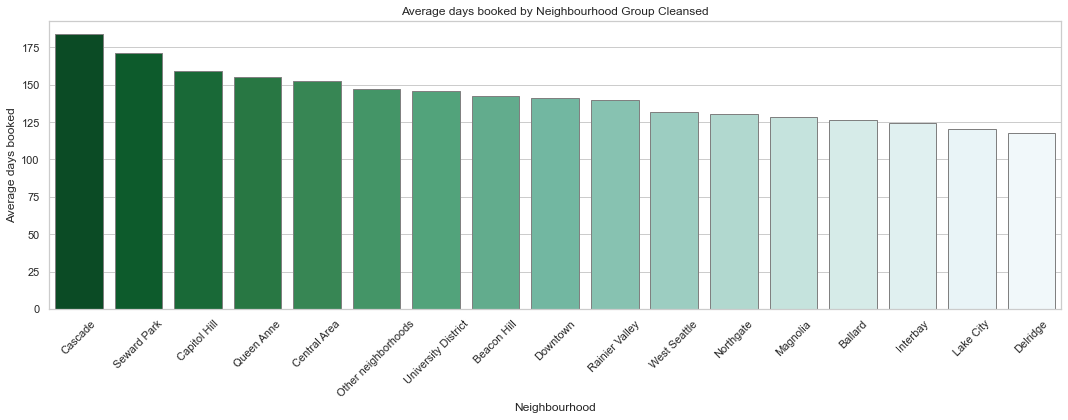

In [316]:
sns.set(style="whitegrid")

# Create a barplot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(x=df_neighbourhood_daysbooked.index , y=df_neighbourhood_daysbooked.days_booked, data=df_neighbourhood_daysbooked, palette='BuGn_r', edgecolor='grey', hue=df_neighbourhood_daysbooked.index, legend=False)

# Adding labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Average days booked')
plt.title('Average days booked by Neighbourhood Group Cleansed')
plt.xticks(rotation=45)

# Adjust layout to prevent clipping of rotated labels
plt.tight_layout()

# Show the plot
plt.show();

The neighborhoods with the highest booking rates are Cascade, Seward Park and Capitol Hill.
Queen Anne is a neighborhood that performs well in average price and booking rate is. It is placed 4th in terms of booking rate and placed 3rd in terms of avergade price.


### 2. What are the peak and off-peak months for staying in an Airbnb in Seattle?


To answer this question a line chart as a pivotal visualization tool to illustrate trends and variations in continuous data over time was chosen. Line charts offer a dynamic representation, allowing for the seamless depiction of patterns and fluctuations within the dataset.

#### How much does the price change over the months?

In [317]:
# Creating a function to add a month column to the dataframe

def add_month_column(df):
    """
    Adds a 'month' column to the provided DataFrame based on the 'date' column (datetime).

    Parameters:
    - df (pd.DataFrame): The DataFrame containing a 'date' column.

    Returns:
    pd.DataFrame: The DataFrame with an additional 'month' column representing the month of each date.
    """
    # Ensure 'date' column is in datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Add 'month' column using lambda expression
    df['month'] = df['date'].apply(lambda x: x.month)

    return df

Calculating the average price per night for each month:

In [318]:
df_calendar = add_month_column(df_calendar)
df_calendar_month_price = df_calendar[['month', 'price']].groupby('month').mean()
df_calendar_month_price.head()

,price
month,
1,122.912176
2,124.293927
3,128.644488
4,135.097005
5,139.538183


Creating a line chart to see  the average price trend for Seattle over months in 2016

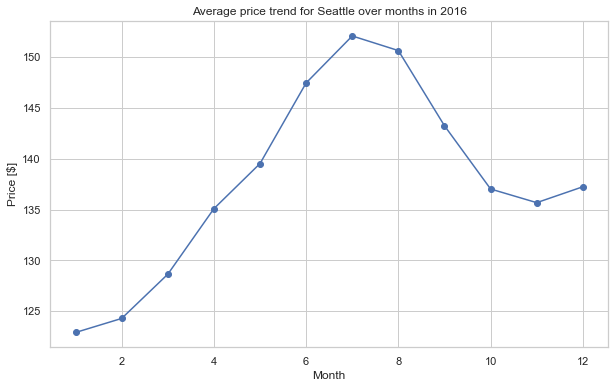

In [319]:
plt.figure(figsize=(10, 6))
plt.plot(df_calendar_month_price.index, df_calendar_month_price['price'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Price [$]')
plt.title('Average price trend for Seattle over months in 2016')

# Show the plot
plt.show()

The average price is high in the summer months and peaks in July.

#### How much does the occupation rate change over the months?

Calculating the average days booked per month:

In [320]:
df_calendar['booked'] = df_calendar['available'].map({'t': False, 'f': True})
df_calendar_bookingspermonth = df_calendar[['month', 'booked']].groupby('month').sum()
df_calendar_bookingspermonth.head()

,booked
month,
1,49603
2,37401
3,34420
4,38503
5,38387


Creating a line chart to see the booked days per month for Seattle in 2016

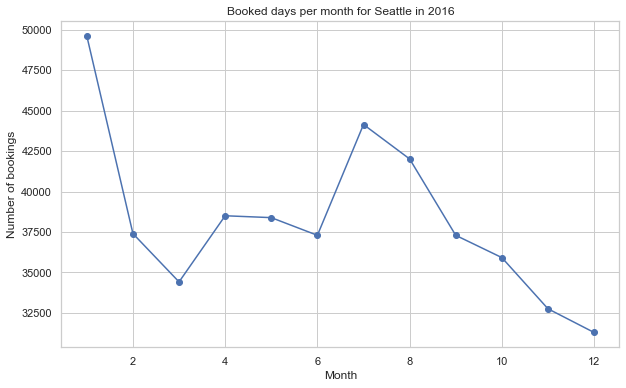

In [321]:
plt.figure(figsize=(10, 6))
plt.plot(df_calendar_bookingspermonth.index, df_calendar_bookingspermonth['booked'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.title('Booked days per month for Seattle in 2016')

# Show the plot
plt.show()

The number of Airbnb bookings in Seattle have a peak in January and a smaller peak in July.

### 3. What variables hold the most significance in attaining a high occupancy rate?

#### Linear Regression Model

 To answer this question, a linear regression model was chosen. Linear regression allows for the identification of relationships and quantification of the impact of independent variables on the dependent one. Through this method, one can uncover the most influential factors, providing a quantitative basis for understanding their impact.

Choosing relevant colummns for the following investigation of the dataset

In [322]:
df_model = df_listings[['days_booked', 'host_is_superhost', 'room_type', 'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 'bathrooms', 'bedrooms', 'beds']]
df_model.head()

,days_booked,host_is_superhost,room_type,cleaning_fee,number_of_reviews,review_scores_rating,bathrooms,bedrooms,beds
0,19,f,Entire home/apt,NaN,207,95.0,1.0,1.0,1.0
1,74,t,Entire home/apt,40.0,43,96.0,1.0,1.0,1.0
2,145,f,Entire home/apt,300.0,20,97.0,4.5,5.0,7.0
3,222,f,Entire home/apt,NaN,0,NaN,1.0,0.0,2.0
4,63,f,Private room,40.0,17,95.0,1.0,1.0,1.0


#### Cleaning and formatting data to prepare for modelling

In [323]:
df_model.host_is_superhost.value_counts()

host_is_superhost
f    2447
t     691
Name: count, dtype: int64

The column host_is_superhost is binary. For the further analysis the values will be replaced with True and False:

In [324]:
df_model['host_is_superhost'] = df_model['host_is_superhost'].map({'t': True, 'f': False})

/var/folders/ml/jnncc33j5b34g26mm7srrjhr0000gn/T/ipykernel_2772/1538270096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['host_is_superhost'] = df_model['host_is_superhost'].map({'t': True, 'f': False})


In [325]:
# dropping columns due to low data availability
# df_model = df_model.drop('experiences_offered', axis=1)
# df_model = df_model.drop('square_feet', axis=1)


Why filling nan values with the mean?

 By imputing missing values with the mean, it is avoided to discard entire rows or columns with missing data. This helps in maximizing the utilization of available information, leading to more comprehensive analyses.

In [326]:
# Filling missing values with the column's average.
df_model.review_scores_rating = df_model.review_scores_rating.fillna(df_model.review_scores_rating.mean())
df_model.cleaning_fee = df_model.cleaning_fee.fillna(df_model.cleaning_fee.mean())
df_model.bathrooms = df_model.bathrooms.fillna(df_model.bathrooms.mean())
df_model.bedrooms = df_model.bedrooms.fillna(df_model.bedrooms.mean())
df_model.beds = df_model.beds.fillna(df_model.beds.mean())

/var/folders/ml/jnncc33j5b34g26mm7srrjhr0000gn/T/ipykernel_2772/364640394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.review_scores_rating = df_model.review_scores_rating.fillna(df_model.review_scores_rating.mean())
/var/folders/ml/jnncc33j5b34g26mm7srrjhr0000gn/T/ipykernel_2772/364640394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.cleaning_fee = df_model.cleaning_fee.fillna(df_model.cleaning_fee.mean())
/var/folders/ml/jnncc33j5b34g26mm7srrjhr0000gn/T/ipykernel_2772/364640

#### Dealing with categorical values


Dealing with categorical values in a linear regression requires converting them into a format that can be used in the model.
Converting categorical variables into binary columns (0 or 1) for each category using one-hot encoding. Each category becomes a new column, and the presence of the category is represented by 1, while its absence is represented by 0.

In [327]:
# create dummy columns
dummy_cols_df = pd.get_dummies(df_model['room_type'], dummy_na=False)

In [328]:
# drop old categorial column
df_model = pd.concat([df_model, dummy_cols_df], axis=1)
df_model = df_model.drop('room_type', axis=1)

#### Build Model

In [329]:
# define explanatory and response variables

y = df_model['days_booked']
X = df_model.drop('days_booked', axis=1)

In [330]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [331]:
#lm_model = LinearRegression(normalize=True) # Instantiate
lm_model = LinearRegression() # Instantiate

lm_model.fit(X_train, y_train) #Fit

y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

#### Discussing the results of the linear regression model

In [332]:
# Getting R2 value  for test and trained data
test_score, train_score

(0.047065082020610105, 0.05102155520582308)

An R² value of 0.047065 is quite low. It suggests that only about 4.706% of the variance in the dependent variable can be explained by the independent variables in the linear regression model. This indicates that the linear relationship is weak or that there are other factors influencing the dependent variable that are not considered in the current model.

In [333]:
# Undderstanding the most influential coefficients of the linear model

coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)

In [334]:
coefs_df.head(10)

,est_int,coefs,abs_coefs
7,Entire home/apt,21.523267,21.523267
9,Shared room,-20.451712,20.451712
5,bedrooms,17.836003,17.836003
6,beds,-7.367737,7.367737
4,bathrooms,-7.228281,7.228281
0,host_is_superhost,4.784858,4.784858
8,Private room,-1.071556,1.071556
2,number_of_reviews,-0.594279,0.594279
1,cleaning_fee,-0.408244,0.408244
3,review_scores_rating,-0.004383,0.004383


In summary of the linear regression coefficients, an entire home/apartment exhibits the most significant positive impact, while shared room has the highest negative effect. Surprisingly, the number of bedrooms demonstrates a positive influence, whereas the number of beds shows a negative impact, presenting a somewhat paradoxical relationship.

Additionally, being a super host is advantageous, contributing positively to the occupancy rate, while the remaining variables appear to lack a substantial impact.

## Conclusion

In this Udacity project, the dataset was analyzed to address key business questions for potential Airbnb investors in Seattle. The focus included identifying optimal districts and strategies for achieving high occupancy rates. Here are the main findings:

1) Popular Neighborhoods:
* Magnolia, Downtown, and Queen Anne had the highest average nightly prices.
* Cascade, Seward Park, and Capitol Hill stood out with the highest booking rates.

2) Peak and Off-Peak Months:
* Summer months, especially July, exhibited peak average prices.
* Booking activity peaked in January and had a smaller peak in July.

3) Variables Influencing Occupancy Rate:
* A linear regression model highlighted factors influencing the occupancy rate.
* Notably, entire home/apartment had a significant positive impact, while shared room had the highest negative effect.
* An intriguing paradox was observed: the number of bedrooms positively influenced occupancy, while the number of beds had a negative impact.
* Being a super host was identified as advantageous for a positive impact on the occupancy rate.

In summary, while certain factors influenced occupancy rates, the dataset suggested the presence of unexplored variables. Investors should consider a comprehensive approach, considering neighborhood popularity, seasonal pricing dynamics, and the nuanced impact of property features on occupancy rates.